In [71]:
# install packages and get data
import pandas as pd
import numpy as np
import seaborn as sns

demand = pd.read_csv("WoolworthsDemands.csv")
locations = pd.read_csv("WoolworthsLocations.csv")
travelDur = pd.read_csv("WoolworthsTravelDurations.csv")

In [27]:
demand_long = demand.melt(id_vars = 'Store',var_name='Date', value_name='Demand' )

demand_long.Date = pd.to_datetime(demand_long.Date)

demand_long['Weekday'] = demand_long.Date.dt.dayofweek

demand_long = demand_long.assign(DayClass=["Weekend" if day in (5,6) else "Weekday" for day in demand_long.Weekday])

demand_long[demand_long.Weekday==1][demand_long.Store=="FreshChoice Otahuhu"]

<ipython-input-27-fcb081ca6e4b>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demand_long[demand_long.Weekday==1][demand_long.Store=="FreshChoice Otahuhu"]


,Store,Date,Demand,Weekday,DayClass
123,FreshChoice Otahuhu,2021-06-15,2,1,Weekday
578,FreshChoice Otahuhu,2021-06-22,2,1,Weekday
1033,FreshChoice Otahuhu,2021-06-29,2,1,Weekday
1488,FreshChoice Otahuhu,2021-07-06,4,1,Weekday


In [56]:
import re
demand_long["StoreClass"] = [
        ("Big","Small")[re.search("(FreshChoice|SuperValue|Countdown Metro).*", store) is not None] for store in demand_long.Store
    ]

demand_long[[re.search("(FreshChoice|SuperValue|Countdown Metro).*", store) is not None for store in demand_long.Store]]


small_df = demand_long[demand_long.StoreClass=="Small"][demand_long.DayClass=="Weekday"]
big_wkday_df = demand_long[demand_long.StoreClass=="Big"][demand_long.DayClass=="Weekday"]
big_wkend_df = demand_long[demand_long.StoreClass=="Big"][demand_long.Weekday==5]

<ipython-input-56-c2cd61f03f3e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  small_df = demand_long[demand_long.StoreClass=="Small"][demand_long.DayClass=="Weekday"]
<ipython-input-56-c2cd61f03f3e>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_wkday_df = demand_long[demand_long.StoreClass=="Big"][demand_long.DayClass=="Weekday"]
<ipython-input-56-c2cd61f03f3e>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_wkend_df = demand_long[demand_long.StoreClass=="Big"][demand_long.Weekday==5]


4.4125


<AxesSubplot:xlabel='Demand', ylabel='Count'>

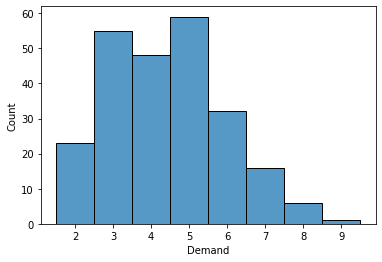

In [78]:
# small_df.Demand.hist(bins=np.arange(0.5,9.5))
print(small_df.Demand.mean())
sns.histplot(small_df.Demand, bins=np.arange(1.5,10.5))

7.986792452830189


<AxesSubplot:xlabel='Demand', ylabel='Count'>

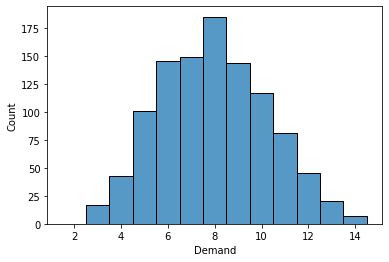

In [76]:
# big_wkday_df.Demand.hist(bins=np.arange(0.5,15.5))
print(big_wkday_df.Demand.mean())
sns.histplot(big_wkday_df.Demand, bins=np.arange(1.5,15.5))

3.8962264150943398


<AxesSubplot:xlabel='Demand', ylabel='Count'>

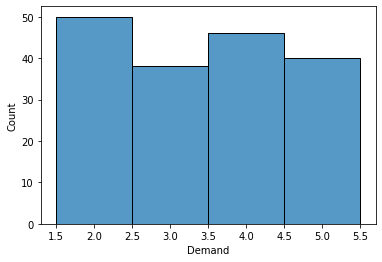

In [75]:
# big_wkend_df.Demand.hist(bins=np.arange(1.5,6.5))
print(big_wkend_df.Demand.mean())

sns.histplot(big_wkend_df.Demand, bins=np.arange(1.5,6.5))
